In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from data_collection import Collection1, Collection2
import xgboost as xgb

## Data Collection

In [21]:
[X_train,Y_train,X_test,ID_test] = Collection1.parse_telecom_data(filename_train='train.csv',filename_test='test.csv')

[X_train,Y_train,X_test,ID_test] = Collection2.parse_telecom_data(filename_train='train.csv',filename_test='test.csv')

## XGBoost case study

0.0
0.25
0.5
0.75
1.0


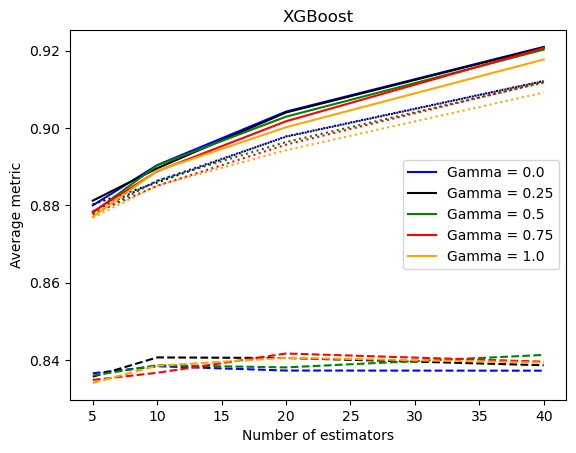

In [17]:
# AdaBoost case study
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True)    

n_est_list = [5, 10, 20, 40]
learn_rate_list = np.linspace(0.02, 0.1,5)
gamma_list = np.linspace(0.0, 1.0, 5)
c = ['b', 'k', 'g', 'r', 'orange']

fig, ax = plt.subplots()

for i,g in enumerate(gamma_list):
    print(g)
    avg_train_metric = np.zeros((len(n_est_list),))
    avg_val_metric = np.zeros((len(n_est_list),))
    avg_full_metric = np.zeros((len(n_est_list),))
    for j,n_est in enumerate(n_est_list):
        train_Metric = 0
        val_Metric = 0
        y_train_prob_avg = 0

        for train_idx, val_idx in kf.split(X_train[:,0]):
            x_train, x_val = X_train[train_idx,:], X_train[val_idx,:]
            y_train, y_val = Y_train[train_idx], Y_train[val_idx]

            clf = xgb.XGBClassifier(n_estimators=n_est, learning_rate=0.1, booster="dart", gamma = g)
            clf.fit(x_train, y_train.flatten())
            
            y_train_prob = clf.predict_proba(x_train)
            thisMetric = metrics.roc_auc_score(y_train, y_train_prob[:,1])
            train_Metric += thisMetric

            y_train_prob = clf.predict_proba(x_val)
            thisMetric = metrics.roc_auc_score(y_val, y_train_prob[:,1])
            val_Metric += thisMetric

            y_train_prob = clf.predict_proba(X_train)
            y_train_prob_avg += y_train_prob[:,1]

        avg_train_metric[j] = train_Metric/n_folds
        avg_val_metric[j] = val_Metric/n_folds
        avg_full_metric[j] = metrics.roc_auc_score(Y_train, y_train_prob_avg/n_folds)

    ax.plot(n_est_list,avg_train_metric, color=c[i], label=f'Gamma = {g}')
    ax.plot(n_est_list,avg_val_metric, color=c[i], linestyle='--')
    ax.plot(n_est_list,avg_full_metric, color=c[i], linestyle=':')
    ax.set_xlabel('Number of estimators')
    ax.set_ylabel('Average metric')
    plt.title('XGBoost')

plt.legend()
plt.show()

0.05
10
10
10
10
10
20
20
20
20
20
40
40
40
40
40
80
80
80
80
80
0.075
10
10
10
10
10
20
20
20
20
20
40
40
40
40
40
80
80
80
80
80
0.1
10
10
10
10
10
20
20
20
20
20
40
40
40
40
40
80
80
80
80
80
0.125
10
10
10
10
10
20
20
20
20
20
40
40
40
40
40
80
80
80
80
80
0.15
10
10
10
10
10
20
20
20
20
20
40
40
40
40
40
80
80
80
80
80


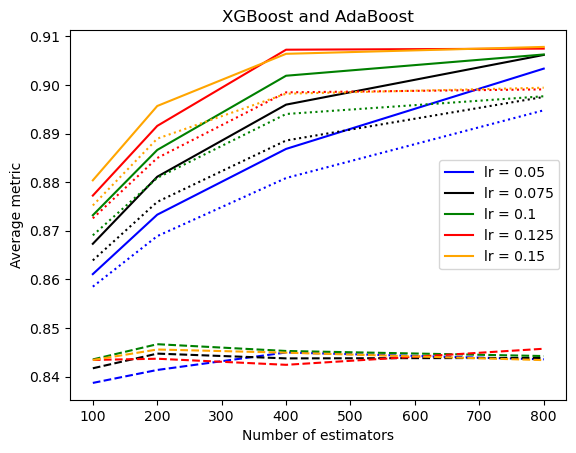

In [60]:
# AdaBoost case study
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True)    

n_est_list = [100, 200, 400, 800]
learn_rate_list = np.linspace(0.05, 0.15,5)
gamma_list = np.linspace(0.0, 1.0, 5)
c = ['b', 'k', 'g', 'r', 'orange']

fig, ax = plt.subplots()

for i,lr in enumerate(learn_rate_list):
    print(lr)
    avg_train_metric = np.zeros((len(n_est_list),))
    avg_val_metric = np.zeros((len(n_est_list),))
    avg_full_metric = np.zeros((len(n_est_list),))
    for j,n_est in enumerate(n_est_list):
        train_Metric = 0
        val_Metric = 0
        y_train_prob_avg = 0

        for train_idx, val_idx in kf.split(X_train[:,0]):
            x_train, x_val = X_train[train_idx,:], X_train[val_idx,:]
            y_train, y_val = Y_train[train_idx], Y_train[val_idx]
            xgb_est = int(n_est/10)
            print(xgb_est)
            clf = xgb.XGBClassifier(n_estimators=xgb_est, learning_rate=lr, booster="dart", gamma = 0.9)

            clf2 = AdaBoostClassifier(n_estimators=n_est, learning_rate=lr, algorithm='SAMME')
            clf.fit(x_train, y_train.flatten())
            clf2.fit(x_train, y_train.flatten())
            
            y_train_prob = clf.predict_proba(x_train)
            y_train_prob2 = clf2.predict_proba(x_train)

            y_train_prob_tot = (y_train_prob + y_train_prob2)/2
            thisMetric = metrics.roc_auc_score(y_train, y_train_prob_tot[:,1])
            train_Metric += thisMetric

            y_train_prob = clf.predict_proba(x_val)
            y_train_prob2 = clf2.predict_proba(x_val)

            y_train_prob_tot = (y_train_prob + y_train_prob2)/2
            thisMetric = metrics.roc_auc_score(y_val, y_train_prob_tot[:,1])
            val_Metric += thisMetric

            y_train_prob = clf.predict_proba(X_train)
            y_train_prob2 = clf2.predict_proba(X_train)

            y_train_prob_tot = (y_train_prob + y_train_prob2)/2
            #y_train_prob = clf.predict_proba(X_train)
            y_train_prob_avg += y_train_prob_tot[:,1]

        avg_train_metric[j] = train_Metric/n_folds
        avg_val_metric[j] = val_Metric/n_folds
        avg_full_metric[j] = metrics.roc_auc_score(Y_train, y_train_prob_avg/n_folds)

    ax.plot(n_est_list,avg_train_metric, color=c[i], label=f'lr = {lr}')
    ax.plot(n_est_list,avg_val_metric, color=c[i], linestyle='--')
    ax.plot(n_est_list,avg_full_metric, color=c[i], linestyle=':')
    ax.set_xlabel('Number of estimators')
    ax.set_ylabel('Average metric')
    plt.title('XGBoost and AdaBoost')

plt.legend()
plt.show()

0.05
0.075
0.1
0.125
0.15


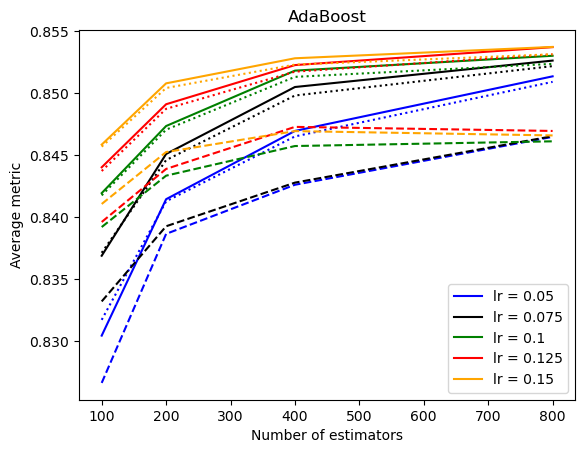

In [59]:
# AdaBoost case study
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True)    

n_est_list = [100, 200, 400, 800]
learn_rate_list = np.linspace(0.05, 0.15,5)
gamma_list = np.linspace(0.0, 1.0, 5)
c = ['b', 'k', 'g', 'r', 'orange']

fig, ax = plt.subplots()

for i,lr in enumerate(learn_rate_list):
    print(lr)
    avg_train_metric = np.zeros((len(n_est_list),))
    avg_val_metric = np.zeros((len(n_est_list),))
    avg_full_metric = np.zeros((len(n_est_list),))
    for j,n_est in enumerate(n_est_list):
        train_Metric = 0
        val_Metric = 0
        y_train_prob_avg = 0

        for train_idx, val_idx in kf.split(X_train[:,0]):
            x_train, x_val = X_train[train_idx,:], X_train[val_idx,:]
            y_train, y_val = Y_train[train_idx], Y_train[val_idx]

            #clf = xgb.XGBClassifier(n_estimators=n_est, learning_rate=lr, booster="dart", gamma = 0.9)

            clf2 = AdaBoostClassifier(n_estimators=n_est, learning_rate=lr, algorithm='SAMME')
            #clf.fit(x_train, y_train.flatten())
            clf2.fit(x_train, y_train.flatten())
            
            #y_train_prob = clf.predict_proba(x_train)
            y_train_prob2 = clf2.predict_proba(x_train)

            y_train_prob_tot = y_train_prob2
            thisMetric = metrics.roc_auc_score(y_train, y_train_prob_tot[:,1])
            train_Metric += thisMetric

            #y_train_prob = clf.predict_proba(x_val)
            y_train_prob2 = clf2.predict_proba(x_val)

            y_train_prob_tot = y_train_prob2
            thisMetric = metrics.roc_auc_score(y_val, y_train_prob_tot[:,1])
            val_Metric += thisMetric

            y_train_prob2 = clf2.predict_proba(X_train)

            y_train_prob_tot = y_train_prob2
            #y_train_prob = clf.predict_proba(X_train)
            y_train_prob_avg += y_train_prob_tot[:,1]

        avg_train_metric[j] = train_Metric/n_folds
        avg_val_metric[j] = val_Metric/n_folds
        avg_full_metric[j] = metrics.roc_auc_score(Y_train, y_train_prob_avg/n_folds)

    ax.plot(n_est_list,avg_train_metric, color=c[i], label=f'lr = {lr}')
    ax.plot(n_est_list,avg_val_metric, color=c[i], linestyle='--')
    ax.plot(n_est_list,avg_full_metric, color=c[i], linestyle=':')
    ax.set_xlabel('Number of estimators')
    ax.set_ylabel('Average metric')
    plt.title('AdaBoost')

plt.legend()
plt.show()

## XGBoost Collection

In [66]:
n_folds = 5
kf = KFold(n_splits=n_folds)    
i = 0
train_Metric = 0
val_Metric = 0
y_train_prob_avg = 0
y_test_prob_avg = 0

for train_idx, val_idx in kf.split(X_train[:,0]):
    print(f'--------------- k-fold {i} ---------------')
    x_train, x_val = X_train[train_idx,:], X_train[val_idx,:]
    y_train, y_val = Y_train[train_idx], Y_train[val_idx]

    clf = xgb.XGBClassifier(n_estimators=20, learning_rate=0.12, gamma = 0.75);
    clf.fit(x_train, y_train.flatten());

    clf2 = AdaBoostClassifier(n_estimators=200, learning_rate=0.75, algorithm='SAMME');
    clf2.fit(x_train, y_train.flatten());
    
    y_prob1 = clf.predict_proba(x_train);
    y_prob2 = clf2.predict_proba(x_train);
    y_prob = (y_prob1 + y_prob2)/2
    thisMetric = metrics.roc_auc_score(y_train, y_prob[:,1]);
    train_Metric += thisMetric
    print("Training metric: ",thisMetric)

    y_prob1 = clf.predict_proba(x_val);
    y_prob2 = clf2.predict_proba(x_val);
    y_prob = (y_prob1 + y_prob2)/2
    thisMetric = metrics.roc_auc_score(y_val, y_prob[:,1]);
    val_Metric += thisMetric
    print("Testing metric: ",thisMetric)

    y_prob1 = clf.predict_proba(X_train);
    y_prob2 = clf2.predict_proba(X_train);
    y_prob = (y_prob1 + y_prob2)/2
    y_train_prob_avg += y_train_prob[:,1]

    y_test_prob1 = clf.predict_proba(X_test);
    y_test_prob2 = clf2.predict_proba(X_test);
    y_test_prob = (y_test_prob1 + y_test_prob2)/2
    y_test_prob_avg += y_test_prob[:,1]
    print(' ')

    i += 1

print(f'Average training metric: {train_Metric/n_folds}')
print(f'Average testing metric: {val_Metric/n_folds}')
thisMetric = metrics.roc_auc_score(Y_train, y_train_prob_avg/n_folds);
print(f'Full training metric: {thisMetric}')

y_test_prob = y_test_prob_avg/n_folds
thisData = np.concatenate((ID_test, np.reshape(y_test_prob,(-1,1))), axis=1);
thisLabel = ['ID','TARGET'];
y_test_prob_pd = pd.DataFrame(data=thisData,columns=thisLabel)
fname_submit = 'test_submission_Wei.csv';
y_test_prob_pd.to_csv(fname_submit,index=False);

--------------- k-fold 0 ---------------
Training metric:  0.8970047926903625
Testing metric:  0.8379658312212523
 
--------------- k-fold 1 ---------------
Training metric:  0.8928988024628595
Testing metric:  0.8633932217231524
 
--------------- k-fold 2 ---------------
Training metric:  0.894939932458617
Testing metric:  0.8399465606771945
 
--------------- k-fold 3 ---------------
Training metric:  0.8964550833568355
Testing metric:  0.8316079512791033
 
--------------- k-fold 4 ---------------
Training metric:  0.8903116884000994
Testing metric:  0.860752095722896
 
Average training metric: 0.8943220598737549
Average testing metric: 0.8467331321247198
Full training metric: 0.9067173858772536
